In [1]:
#import all the necessary libraries
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
#load the dataset
fmcg = pd.read_csv("Dataset.csv")

## PREPROCESSING

In [3]:
fmcg.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [4]:
fmcg.shape

(25000, 24)

In [5]:
fmcg.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        25000.000000         25000.000000       25000.000000   
mean             4.089040             0.773680           3.104200   
std              2.606612             1.199449           1.141663   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     25000.000000     25000.000000    25000.000000  25000.000000   
mean       4985.711560        42.418120        0.098160      0.054640   
std        1052.825252        16.064329        0.297537      0.227281   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4313.000000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num   wh_est_year  \
count     25000.000000   25000.000000  24010.000000  13119.000000   
mean          0.656880     163.537320     28.944398   2009.383185   
std           0.474761      62.718609      7.872534      7.528230   
min           0.000000      55.000000     10.000000   1996.000000   
25%           0.000000     109.000000     24.000000   2003.000000   
50%           1.000000     164.000000     28.000000   2009.000000   
75%           1.000000     218.000000     33.000000   2016.000000   
max           1.000000     271.000000     98.000000   2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                25000.000000   25000.000000      25000.000000   
mean                    17.130440       0.303280          3.482040   
std                      9.161108       0.459684          1.690335   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    25000.000000    25000.000000  
mean        18.812280    22102.632920  
std          8.632382    11607.755077  
min          1.000000     2065.000000  
25%         11.000000    13059.000000  
50%         21.000000    22101.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

In [6]:
fmcg.describe(include='object')

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
count          25000         25000         25000            25000  25000   
unique         25000         25000             2                3      4   
top        WH_100000     EID_50000         Rural            Large  North   
freq               1             1         22957            10169  10278   

       WH_regional_zone  wh_owner_type approved_wh_govt_certificate  
count             25000          25000                        24092  
unique                6              2                            5  
top              Zone 6  Company Owned                            C  
freq               8339          13578                         5501

In [7]:
fmcg.drop(['Ware_house_ID','WH_Manager_ID'], axis=1,inplace=True)

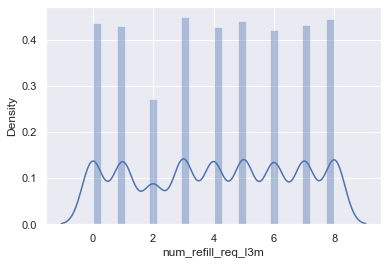

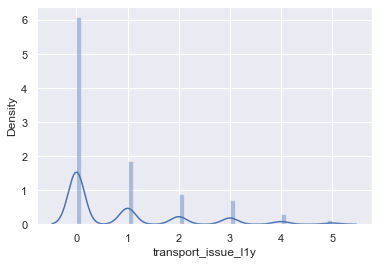

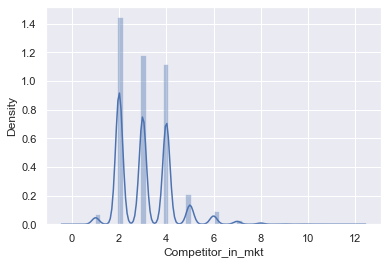

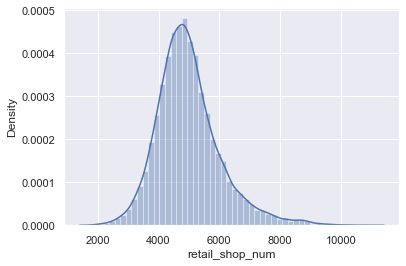

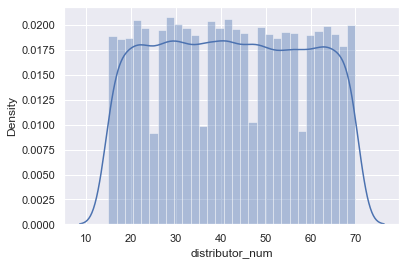

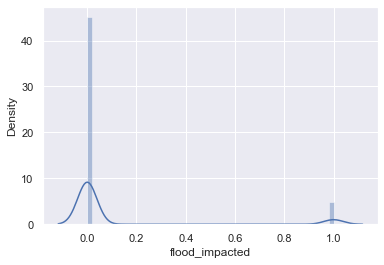

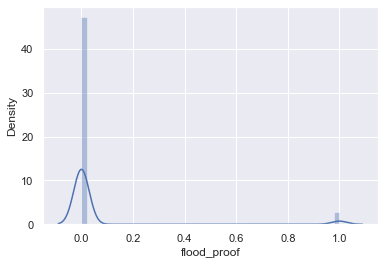

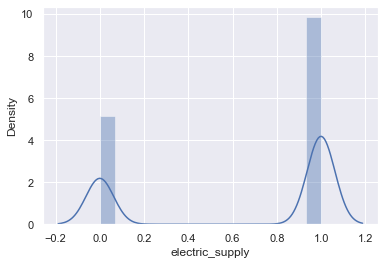

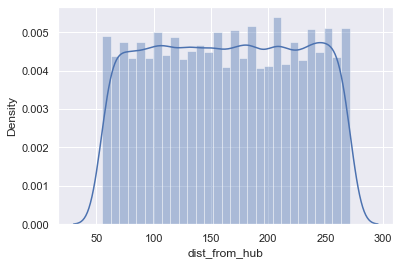

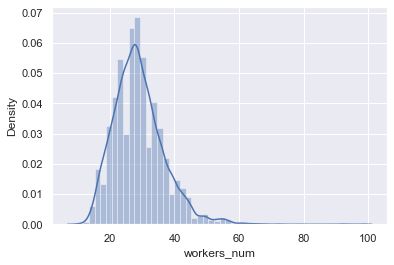

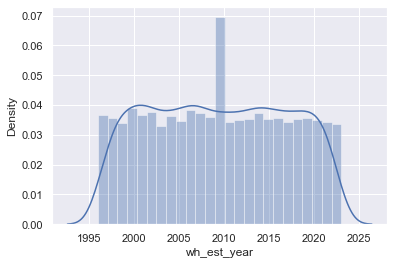

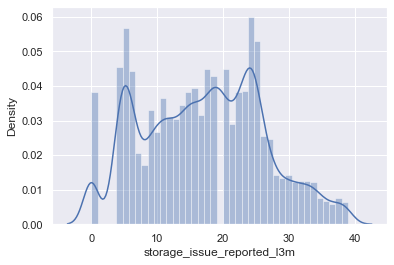

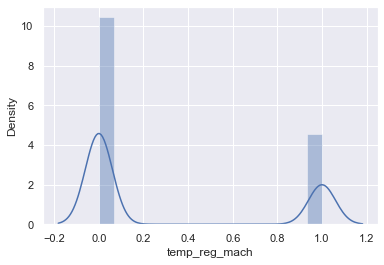

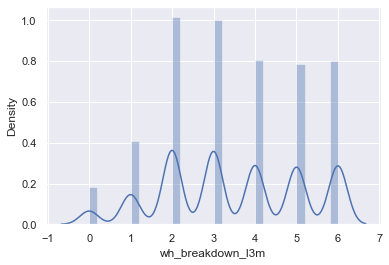

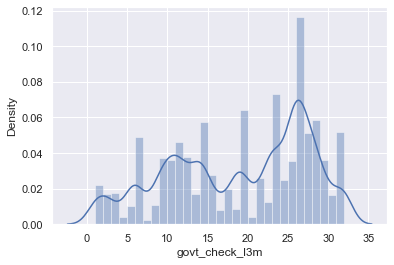

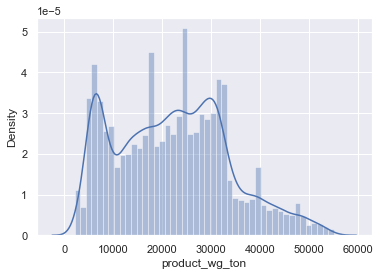

In [8]:
#check the distribution of the dataset
def distplots(col):
    sns.distplot(fmcg[col])
    plt.show()
    
for i in list(fmcg.select_dtypes(exclude=['object']).columns)[0:] :
    distplots(i)

In [9]:
#Check the duplicate values
fmcg.duplicated().sum()

0

### 1.Missing Value Treatemnet

In [10]:
fmcg.isnull().sum()

Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

<AxesSubplot:xlabel='workers_num'>

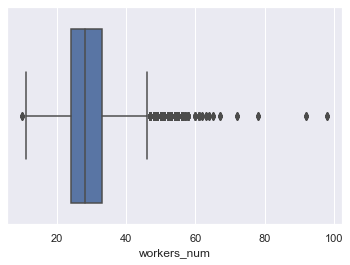

In [11]:
#check for outliers: If yes-->fill with 'median' value, If no--> fill with 'mean' value
sns.boxplot('workers_num',data=fmcg)

In [12]:
fmcg['workers_num'].median()

28.0

In [13]:
fmcg['workers_num'].fillna(fmcg['workers_num'].median(),inplace=True)

In [14]:
#for categorical values fill the missing values with 'mode' values
fmcg['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [15]:
fmcg['approved_wh_govt_certificate'].fillna('C', inplace=True)

In [16]:
#the 'warehouse est. year' column have more than 25% missing values, so drop it
print('null values in WareHouse Est Year column:',fmcg['wh_est_year'].isna().sum()/fmcg.shape[0]*100,'%')

null values in WareHouse Est Year column: 47.524 %


In [17]:
fmcg.drop(['wh_est_year'],axis=1,inplace=True)

In [18]:
#Now, there is no missing values
fmcg.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [19]:
#having a glance on the unique values of each column
for i in fmcg.columns:
    print('********',i,'********')
    print()
    print(set(fmcg[i].to_list()))
    print()

******** Location_type ********

{'Rural', 'Urban'}

******** WH_capacity_size ********

{'Small', 'Large', 'Mid'}

******** zone ********

{'North', 'East', 'South', 'West'}

******** WH_regional_zone ********

{'Zone 2', 'Zone 3', 'Zone 5', 'Zone 6', 'Zone 1', 'Zone 4'}

******** num_refill_req_l3m ********

{0, 1, 2, 3, 4, 5, 6, 7, 8}

******** transport_issue_l1y ********

{0, 1, 2, 3, 4, 5}

******** Competitor_in_mkt ********

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12}

******** retail_shop_num ********

{8192, 8193, 8195, 8196, 8197, 8200, 8203, 8204, 8205, 8207, 8212, 8220, 8224, 8227, 8228, 8231, 8233, 8234, 8236, 8237, 8238, 8241, 8245, 8247, 8248, 8250, 8251, 8253, 8257, 8258, 8263, 8268, 8275, 8276, 8278, 8280, 8281, 8293, 8297, 8299, 8304, 8308, 8309, 8317, 8324, 8325, 8332, 8335, 8338, 8344, 8352, 8353, 8355, 8358, 8360, 8361, 8364, 8367, 8373, 8376, 8379, 8386, 8407, 8411, 8417, 8418, 8427, 8428, 8429, 8431, 8434, 8437, 8449, 8451, 8457, 8466, 8468, 8469, 8470, 8472, 8474, 8

In [20]:
#numerical columns
fmcg.select_dtypes(exclude=['object']).columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [21]:
fmcg.head()

Location_type WH_capacity_size   zone WH_regional_zone  num_refill_req_l3m  \
0         Urban            Small   West           Zone 6                   3   
1         Rural            Large  North           Zone 5                   0   
2         Rural              Mid  South           Zone 2                   1   
3         Rural              Mid  North           Zone 3                   7   
4         Rural            Large  North           Zone 5                   3   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                    1                  2             4651         Rented   
1                    0                  4             6217  Company Owned   
2                    0                  4             4306  Company Owned   
3                    4                  2             6000         Rented   
4                    1                  2             4740  Company Owned   

   distributor_num  flood_impacted  flood_proof  electric_supply  \
0               24               0            1                1   
1               47               0            0                1   
2               64               0            0                0   
3               50               0            0                0   
4               42               1            0                1   

   dist_from_hub  workers_num  storage_issue_reported_l3m  temp_reg_mach  \
0             91         29.0                          13              0   
1            210         31.0                           4              0   
2            161         37.0                          17              0   
3            103         21.0                          17              1   
4            112         25.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

### 2. Encoding

In [22]:
#categorical columns- If 2 unique values-->'Label Encoder', If more than 2 unique values-->'One Hot Encoder'
fmcg.select_dtypes(include=['object']).columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'wh_owner_type', 'approved_wh_govt_certificate'],
      dtype='object')

In [23]:
fmcg['Location_type'].value_counts()

Rural    22957
Urban     2043
Name: Location_type, dtype: int64

In [24]:
fmcg['WH_capacity_size'].value_counts()

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64

In [25]:
fmcg['zone'].value_counts()

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

In [26]:
fmcg['WH_regional_zone'].value_counts()

Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64

In [27]:
fmcg['wh_owner_type'].value_counts()

Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64

In [28]:
fmcg['approved_wh_govt_certificate'].value_counts()

C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [29]:
#One Hot Encoder
fmcg=pd.get_dummies(fmcg,columns=[ 'WH_capacity_size', 'zone', 'WH_regional_zone','approved_wh_govt_certificate'])
fmcg.head()

Location_type  num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0         Urban                   3                    1                  2   
1         Rural                   0                    0                  4   
2         Rural                   1                    0                  4   
3         Rural                   7                    4                  2   
4         Rural                   3                    1                  2   

   retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
0             4651         Rented               24               0   
1             6217  Company Owned               47               0   
2             4306  Company Owned               64               0   
3             6000         Rented               50               0   
4             4740  Company Owned               42               1   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0            1                1             91         29.0   
1            0                1            210         31.0   
2            0                0            161         37.0   
3            0                0            103         21.0   
4            0                1            112         25.0   

   storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
0                          13              0                 5   
1                           4              0                 3   
2                          17              0                 6   
3                          17              1                 3   
4                          18              0                 6   

   govt_check_l3m  product_wg_ton  WH_capacity_size_Large  \
0              15           17115                       0   
1              17            5074                       1   
2              22           23137                       0   
3              27           22115                       0   
4              24           24071                       1   

   WH_capacity_size_Mid  WH_capacity_size_Small  zone_East  zone_North  \
0                     0                       1          0           0   
1                     0                       0          0           1   
2                     1                       0          0           0   
3                     1                       0          0           1   
4                     0                       0          0           1   

   zone_South  zone_West  WH_regional_zone_Zone 1  WH_regional_zone_Zone 2  \
0           0          1                        0                        0   
1           0          0                        0                        0   
2           1          0                        0                        1   
3           0          0                        0                        0   
4           0          0                        0                        0   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                        0                        0                        0   
1                        0                        0                        1   
2                        0                        0                        0   
3                        1                        0                        0   
4                        0                        0                        1   

   WH_regional_zone_Zone 6  approved_wh_govt_certificate_A  \
0                        1                               1   
1                        0                               1   
2                        0                               1   
3                        0                               0   
4                        0                               0   

   approved_wh_govt_certificate_A+  approved_wh_govt_certificate_B  \
0                                0                               0   
1                                0                     

In [30]:
#droping one column on each encoded column to aviod the Multicolinearity problem
fmcg = fmcg.drop(['WH_capacity_size_Large','zone_East','WH_regional_zone_Zone 1','approved_wh_govt_certificate_A'],axis=1)

In [31]:
#Label Encoder
fmcg['Location_type'] = fmcg['Location_type'].astype('category')
fmcg['Location_type'] = fmcg['Location_type'].cat.codes

fmcg['wh_owner_type'] = fmcg['wh_owner_type'].astype('category')
fmcg['wh_owner_type'] = fmcg['wh_owner_type'].cat.codes

In [32]:
#now all the columns changed into numerical 
fmcg.head()

Location_type  num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0              1                   3                    1                  2   
1              0                   0                    0                  4   
2              0                   1                    0                  4   
3              0                   7                    4                  2   
4              0                   3                    1                  2   

   retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
0             4651              1               24               0   
1             6217              0               47               0   
2             4306              0               64               0   
3             6000              1               50               0   
4             4740              0               42               1   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0            1                1             91         29.0   
1            0                1            210         31.0   
2            0                0            161         37.0   
3            0                0            103         21.0   
4            0                1            112         25.0   

   storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
0                          13              0                 5   
1                           4              0                 3   
2                          17              0                 6   
3                          17              1                 3   
4                          18              0                 6   

   govt_check_l3m  product_wg_ton  WH_capacity_size_Mid  \
0              15           17115                     0   
1              17            5074                     0   
2              22           23137                     1   
3              27           22115                     1   
4              24           24071                     0   

   WH_capacity_size_Small  zone_North  zone_South  zone_West  \
0                       1           0           0          1   
1                       0           1           0          0   
2                       0           0           1          0   
3                       0           1           0          0   
4                       0           1           0          0   

   WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        1                        0                        0   
3                        0                        1                        0   
4                        0                        0                        0   

   WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  \
0                        0                        1   
1                        1                        0   
2                        0                        0   
3                        0                        0   
4                        1                        0   

   approved_wh_govt_certificate_A+  approved_wh_govt_certificate_B  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                1                               0   
4                                0                               0   

   approved_wh_govt_certificate_B+  approved_wh_govt_certificate_C  
0                                0                               0  
1                                0                               0  
2                                0                               0  
3                                0                               0  
4      

### 3.Outlier Treatment

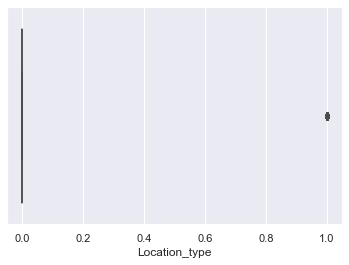

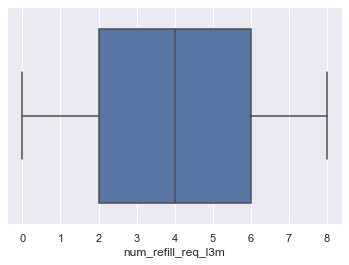

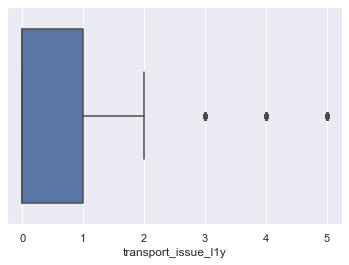

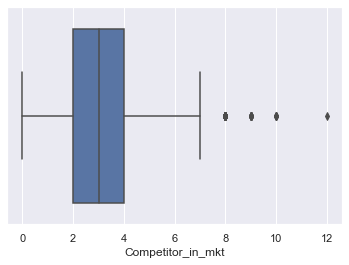

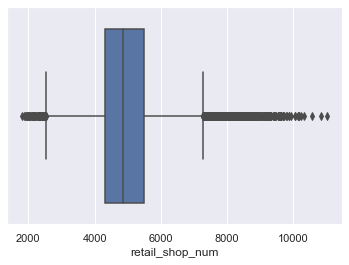

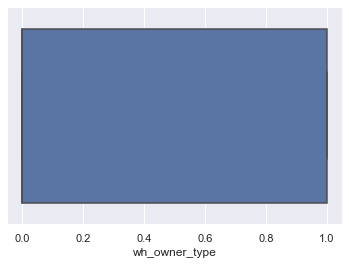

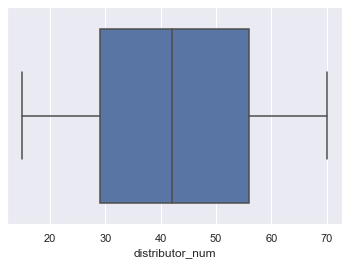

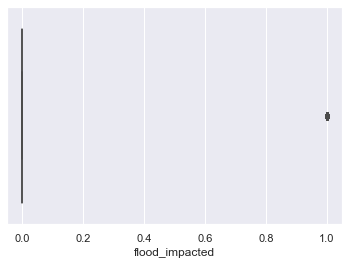

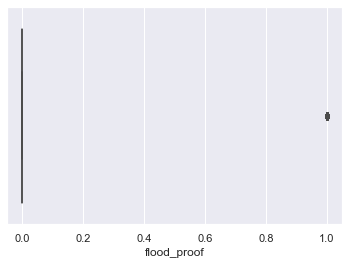

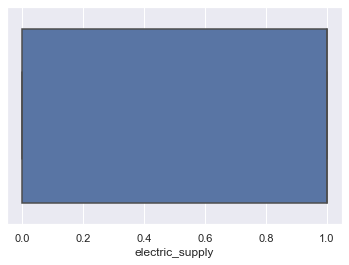

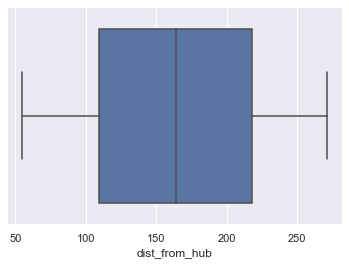

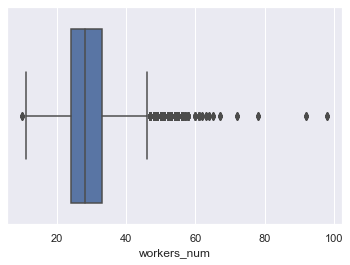

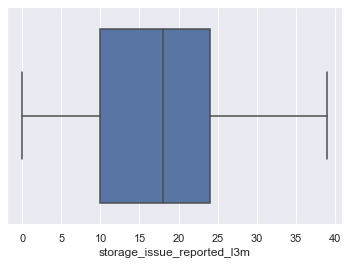

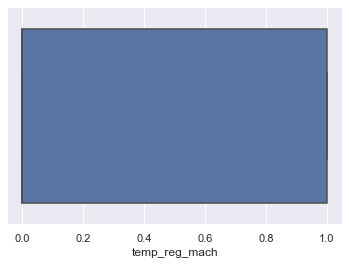

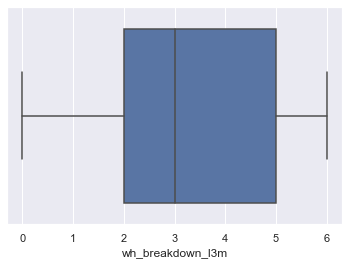

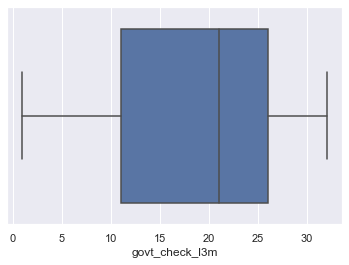

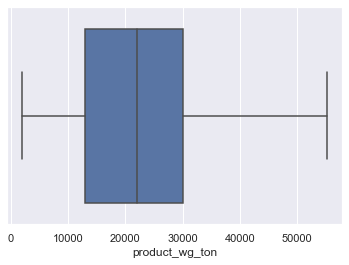

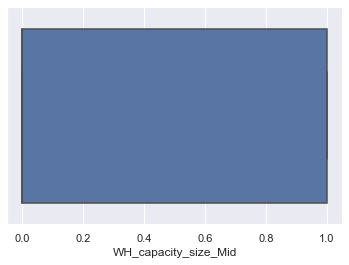

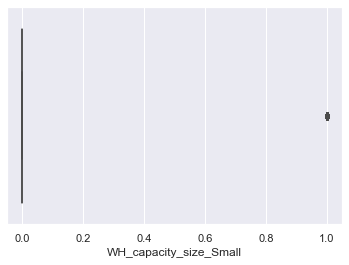

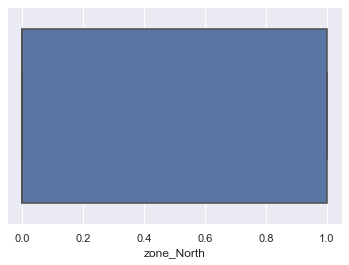

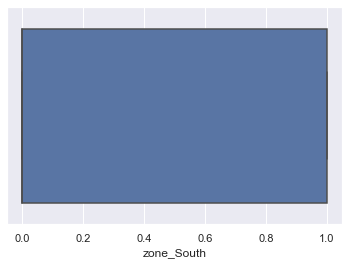

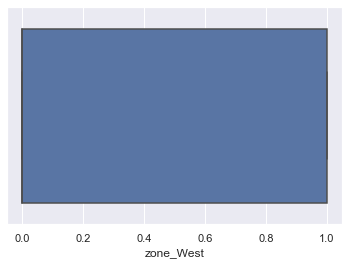

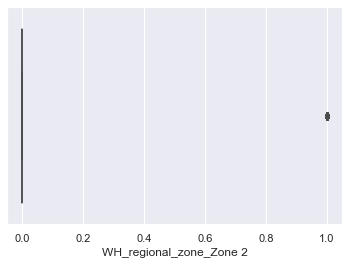

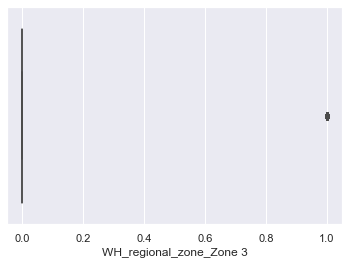

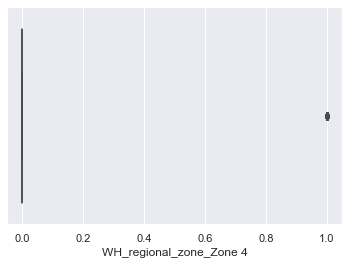

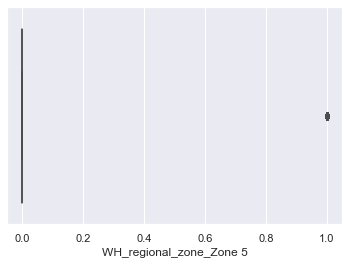

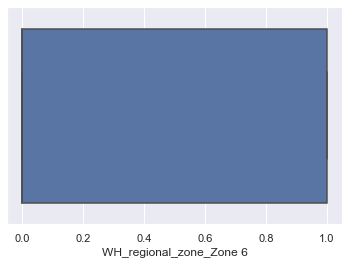

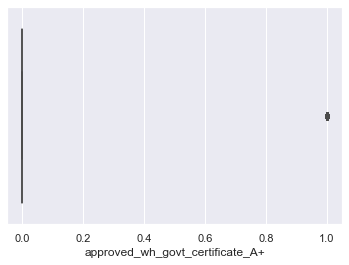

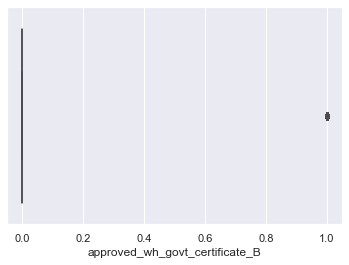

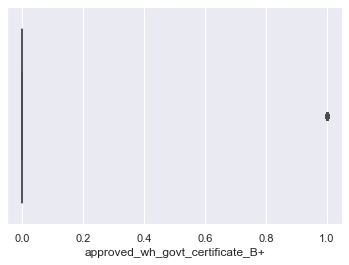

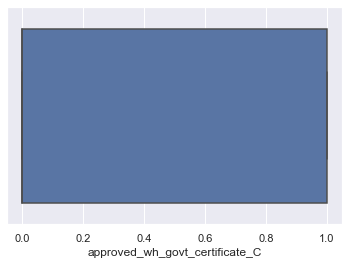

In [33]:
#check for outliers in the dataset
def boxplots(col):
    sns.boxplot(fmcg[col])
    plt.show()
    
for i in list(fmcg.select_dtypes(exclude=["object"]).columns)[0:]:
    boxplots(i)
    
    

In [34]:
#only the 'no of retail shops' and 'no of workers' columns have real outlier values.

In [35]:
fmcg_cap = fmcg.copy()

In [36]:
#IQR method
pct25 = fmcg['retail_shop_num'].quantile(0.25)
pct75 = fmcg['retail_shop_num'].quantile(0.75)
iqr = pct75 - pct25
UL = pct75+1.5*iqr
LL = pct25-1.5*iqr

In [37]:
fmcg_cap['retail_shop_num'] = np.where(fmcg_cap['retail_shop_num']>UL,UL,
                                      np.where(fmcg_cap['retail_shop_num']<LL,LL,fmcg_cap['retail_shop_num']))

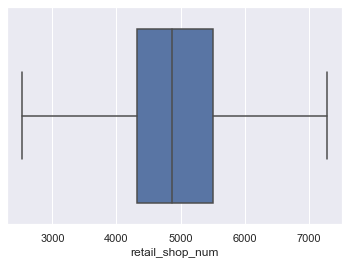

In [38]:
sns.boxplot(fmcg_cap['retail_shop_num'])
plt.show()

In [39]:
pct25 = fmcg['workers_num'].quantile(0.25)
pct75 = fmcg['workers_num'].quantile(0.75)
iqr = pct75 - pct25
UL = pct75+1.5*iqr
LL = pct25-1.5*iqr

In [40]:
fmcg_cap['workers_num'] = np.where(fmcg_cap['workers_num']>UL,UL,
                                      np.where(fmcg_cap['workers_num']<LL,LL,fmcg_cap['workers_num']))

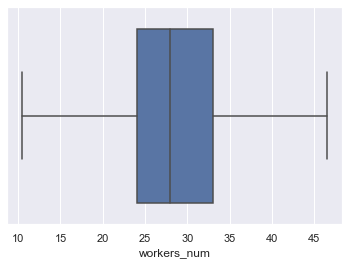

In [41]:
sns.boxplot(fmcg_cap['workers_num'])
plt.show()

In [42]:
# Finding correlation before feature scaling
plt.figure(figsize=(40,40),dpi=300)
corr = fmcg_cap.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')

<AxesSubplot:>

### 4. Feature Scaling

In [43]:
#Before Feature Scaling, the data needs to be splited into dependent and independent
x = fmcg_cap.drop(['product_wg_ton'],axis=1)
y = fmcg_cap[['product_wg_ton']]

In [44]:
columns = fmcg_cap.drop(['product_wg_ton'],axis=1).columns
columns

Index(['Location_type', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m',
       'WH_capacity_size_Mid', 'WH_capacity_size_Small', 'zone_North',
       'zone_South', 'zone_West', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6',
       'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C'],
      dtype='object')

In [45]:
#standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
x = pd.DataFrame(sc_x, columns=columns)
x.head()

Location_type  num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0       3.352150           -0.417807             0.188690          -0.967205   
1      -0.298316           -1.568750            -0.645043           0.784661   
2      -0.298316           -1.185102            -0.645043           0.784661   
3      -0.298316            1.116783             2.689890          -0.967205   
4      -0.298316           -0.417807             0.188690          -0.967205   

   retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
0        -0.317618       1.090302        -1.146546       -0.329915   
1         1.297843      -0.917177         0.285226       -0.329915   
2        -0.673514      -0.917177         1.343493       -0.329915   
3         1.073989       1.090302         0.471979       -0.329915   
4        -0.225807      -0.917177        -0.026028        3.031081   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0     4.159520         0.722737      -1.156575     0.036913   
1    -0.240412         0.722737       0.740827     0.317090   
2    -0.240412        -1.383630      -0.040456     1.157622   
3    -0.240412        -1.383630      -0.965240    -1.083795   
4    -0.240412         0.722737      -0.821739    -0.523441   

   storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
0                   -0.450876      -0.659770          0.898041   
1                   -1.433309      -0.659770         -0.285180   
2                   -0.014239      -0.659770          1.489652   
3                   -0.014239       1.515679         -0.285180   
4                    0.094921      -0.659770          1.489652   

   govt_check_l3m  WH_capacity_size_Mid  WH_capacity_size_Small  zone_North  \
0       -0.441634             -0.817858                2.048518   -0.835547   
1       -0.209944             -0.817858               -0.488158    1.196821   
2        0.369282              1.222706               -0.488158   -0.835547   
3        0.948508              1.222706               -0.488158    1.196821   
4        0.600972             -0.817858               -0.488158    1.196821   

   zone_South  zone_West  WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
0   -0.584248   1.467034                -0.366682                -0.360902   
1   -0.584248  -0.681648                -0.366682                -0.360902   
2    1.711602  -0.681648                 2.727159                -0.360902   
3   -0.584248  -0.681648                -0.366682                 2.770838   
4   -0.584248  -0.681648                -0.366682                -0.360902   

   WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  \
0                -0.447815                -0.474036                 1.413493   
1                -0.447815                 2.109546                -0.707467   
2                -0.447815                -0.474036                -0.707467   
3                -0.447815                -0.474036                -0.707467   
4                -0.447815                 2.109546                -0.707467   

   approved_wh_govt_certificate_A+  approved_wh_govt_certificate_B  \
0                        -0.448780                       -0.488221   
1                        -0.448780                       -0.488221   
2                        -0.448780                       -0.488221   
3                         2.228265                       -0.488221   
4                        -0.448780                       -0.488221   

   approved_wh_govt_certificate_B+  approved_wh_govt_certificate_C  
0                        -0.494807                       -0.587143  
1                        -0.494807                       -0.587143  
2                        -0.494807                       -0.587143  
3                        -0.494807                       -0.587143  
4                        -0.494807                        1.703163

In [46]:
sc_x.shape

(25000, 30)

In [47]:
x.shape

(25000, 30)

###   checking VIF values

In [48]:
#Check VIF for for Muliticolinearity- If more than 5--> droping it(Not all)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i ) for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [49]:
vif

Variance Inflation Factor                         Features
0                    1.008204                    Location_type
1                    1.094454               num_refill_req_l3m
2                    1.030115              transport_issue_l1y
3                    1.281716                Competitor_in_mkt
4                    1.045830                  retail_shop_num
5                    1.077795                    wh_owner_type
6                    1.000836                  distributor_num
7                    1.053144                   flood_impacted
8                    1.022485                      flood_proof
9                    1.205330                  electric_supply
10                   1.001168                    dist_from_hub
11                   1.175059                      workers_num
12                   1.243618       storage_issue_reported_l3m
13                   1.370094                    temp_reg_mach
14                   1.191927                 wh_breakdown_l3m
15                   1.338565                   govt_check_l3m
16                        inf             WH_capacity_size_Mid
17                   2.549710           WH_capacity_size_Small
18                  16.177001                       zone_North
19                  13.309127                       zone_South
20                  14.090755                        zone_West
21                        inf          WH_regional_zone_Zone 2
22                        inf          WH_regional_zone_Zone 3
23                        inf          WH_regional_zone_Zone 4
24                   5.287924          WH_regional_zone_Zone 5
25                   5.126612          WH_regional_zone_Zone 6
26                   1.864546  approved_wh_govt_certificate_A+
27                   1.642591   approved_wh_govt_certificate_B
28                   1.651121  approved_wh_govt_certificate_B+
29                   1.836513   approved_wh_govt_certificate_C

In [50]:
xy=pd.concat([x,y],axis=1)
xy.head()

Location_type  num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0       3.352150           -0.417807             0.188690          -0.967205   
1      -0.298316           -1.568750            -0.645043           0.784661   
2      -0.298316           -1.185102            -0.645043           0.784661   
3      -0.298316            1.116783             2.689890          -0.967205   
4      -0.298316           -0.417807             0.188690          -0.967205   

   retail_shop_num  wh_owner_type  distributor_num  flood_impacted  \
0        -0.317618       1.090302        -1.146546       -0.329915   
1         1.297843      -0.917177         0.285226       -0.329915   
2        -0.673514      -0.917177         1.343493       -0.329915   
3         1.073989       1.090302         0.471979       -0.329915   
4        -0.225807      -0.917177        -0.026028        3.031081   

   flood_proof  electric_supply  dist_from_hub  workers_num  \
0     4.159520         0.722737      -1.156575     0.036913   
1    -0.240412         0.722737       0.740827     0.317090   
2    -0.240412        -1.383630      -0.040456     1.157622   
3    -0.240412        -1.383630      -0.965240    -1.083795   
4    -0.240412         0.722737      -0.821739    -0.523441   

   storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
0                   -0.450876      -0.659770          0.898041   
1                   -1.433309      -0.659770         -0.285180   
2                   -0.014239      -0.659770          1.489652   
3                   -0.014239       1.515679         -0.285180   
4                    0.094921      -0.659770          1.489652   

   govt_check_l3m  WH_capacity_size_Mid  WH_capacity_size_Small  zone_North  \
0       -0.441634             -0.817858                2.048518   -0.835547   
1       -0.209944             -0.817858               -0.488158    1.196821   
2        0.369282              1.222706               -0.488158   -0.835547   
3        0.948508              1.222706               -0.488158    1.196821   
4        0.600972             -0.817858               -0.488158    1.196821   

   zone_South  zone_West  WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
0   -0.584248   1.467034                -0.366682                -0.360902   
1   -0.584248  -0.681648                -0.366682                -0.360902   
2    1.711602  -0.681648                 2.727159                -0.360902   
3   -0.584248  -0.681648                -0.366682                 2.770838   
4   -0.584248  -0.681648                -0.366682                -0.360902   

   WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  \
0                -0.447815                -0.474036                 1.413493   
1                -0.447815                 2.109546                -0.707467   
2                -0.447815                -0.474036                -0.707467   
3                -0.447815                -0.474036                -0.707467   
4                -0.447815                 2.109546                -0.707467   

   approved_wh_govt_certificate_A+  approved_wh_govt_certificate_B  \
0                        -0.448780                       -0.488221   
1                        -0.448780                       -0.488221   
2                        -0.448780                       -0.488221   
3                         2.228265                       -0.488221   
4                        -0.448780                       -0.488221   

   approved_wh_govt_certificate_B+  approved_wh_govt_certificate_C  \
0                        -0.494807                       -0.587143   
1                        -0.494807                       -0.587143   
2                        -0.494807                       -0.587143   
3                        -0.494807                       -0.587143   
4                        -0.494807                        1.703163   

   product_wg_ton  
0           17115  
1            5074 

<AxesSubplot:>

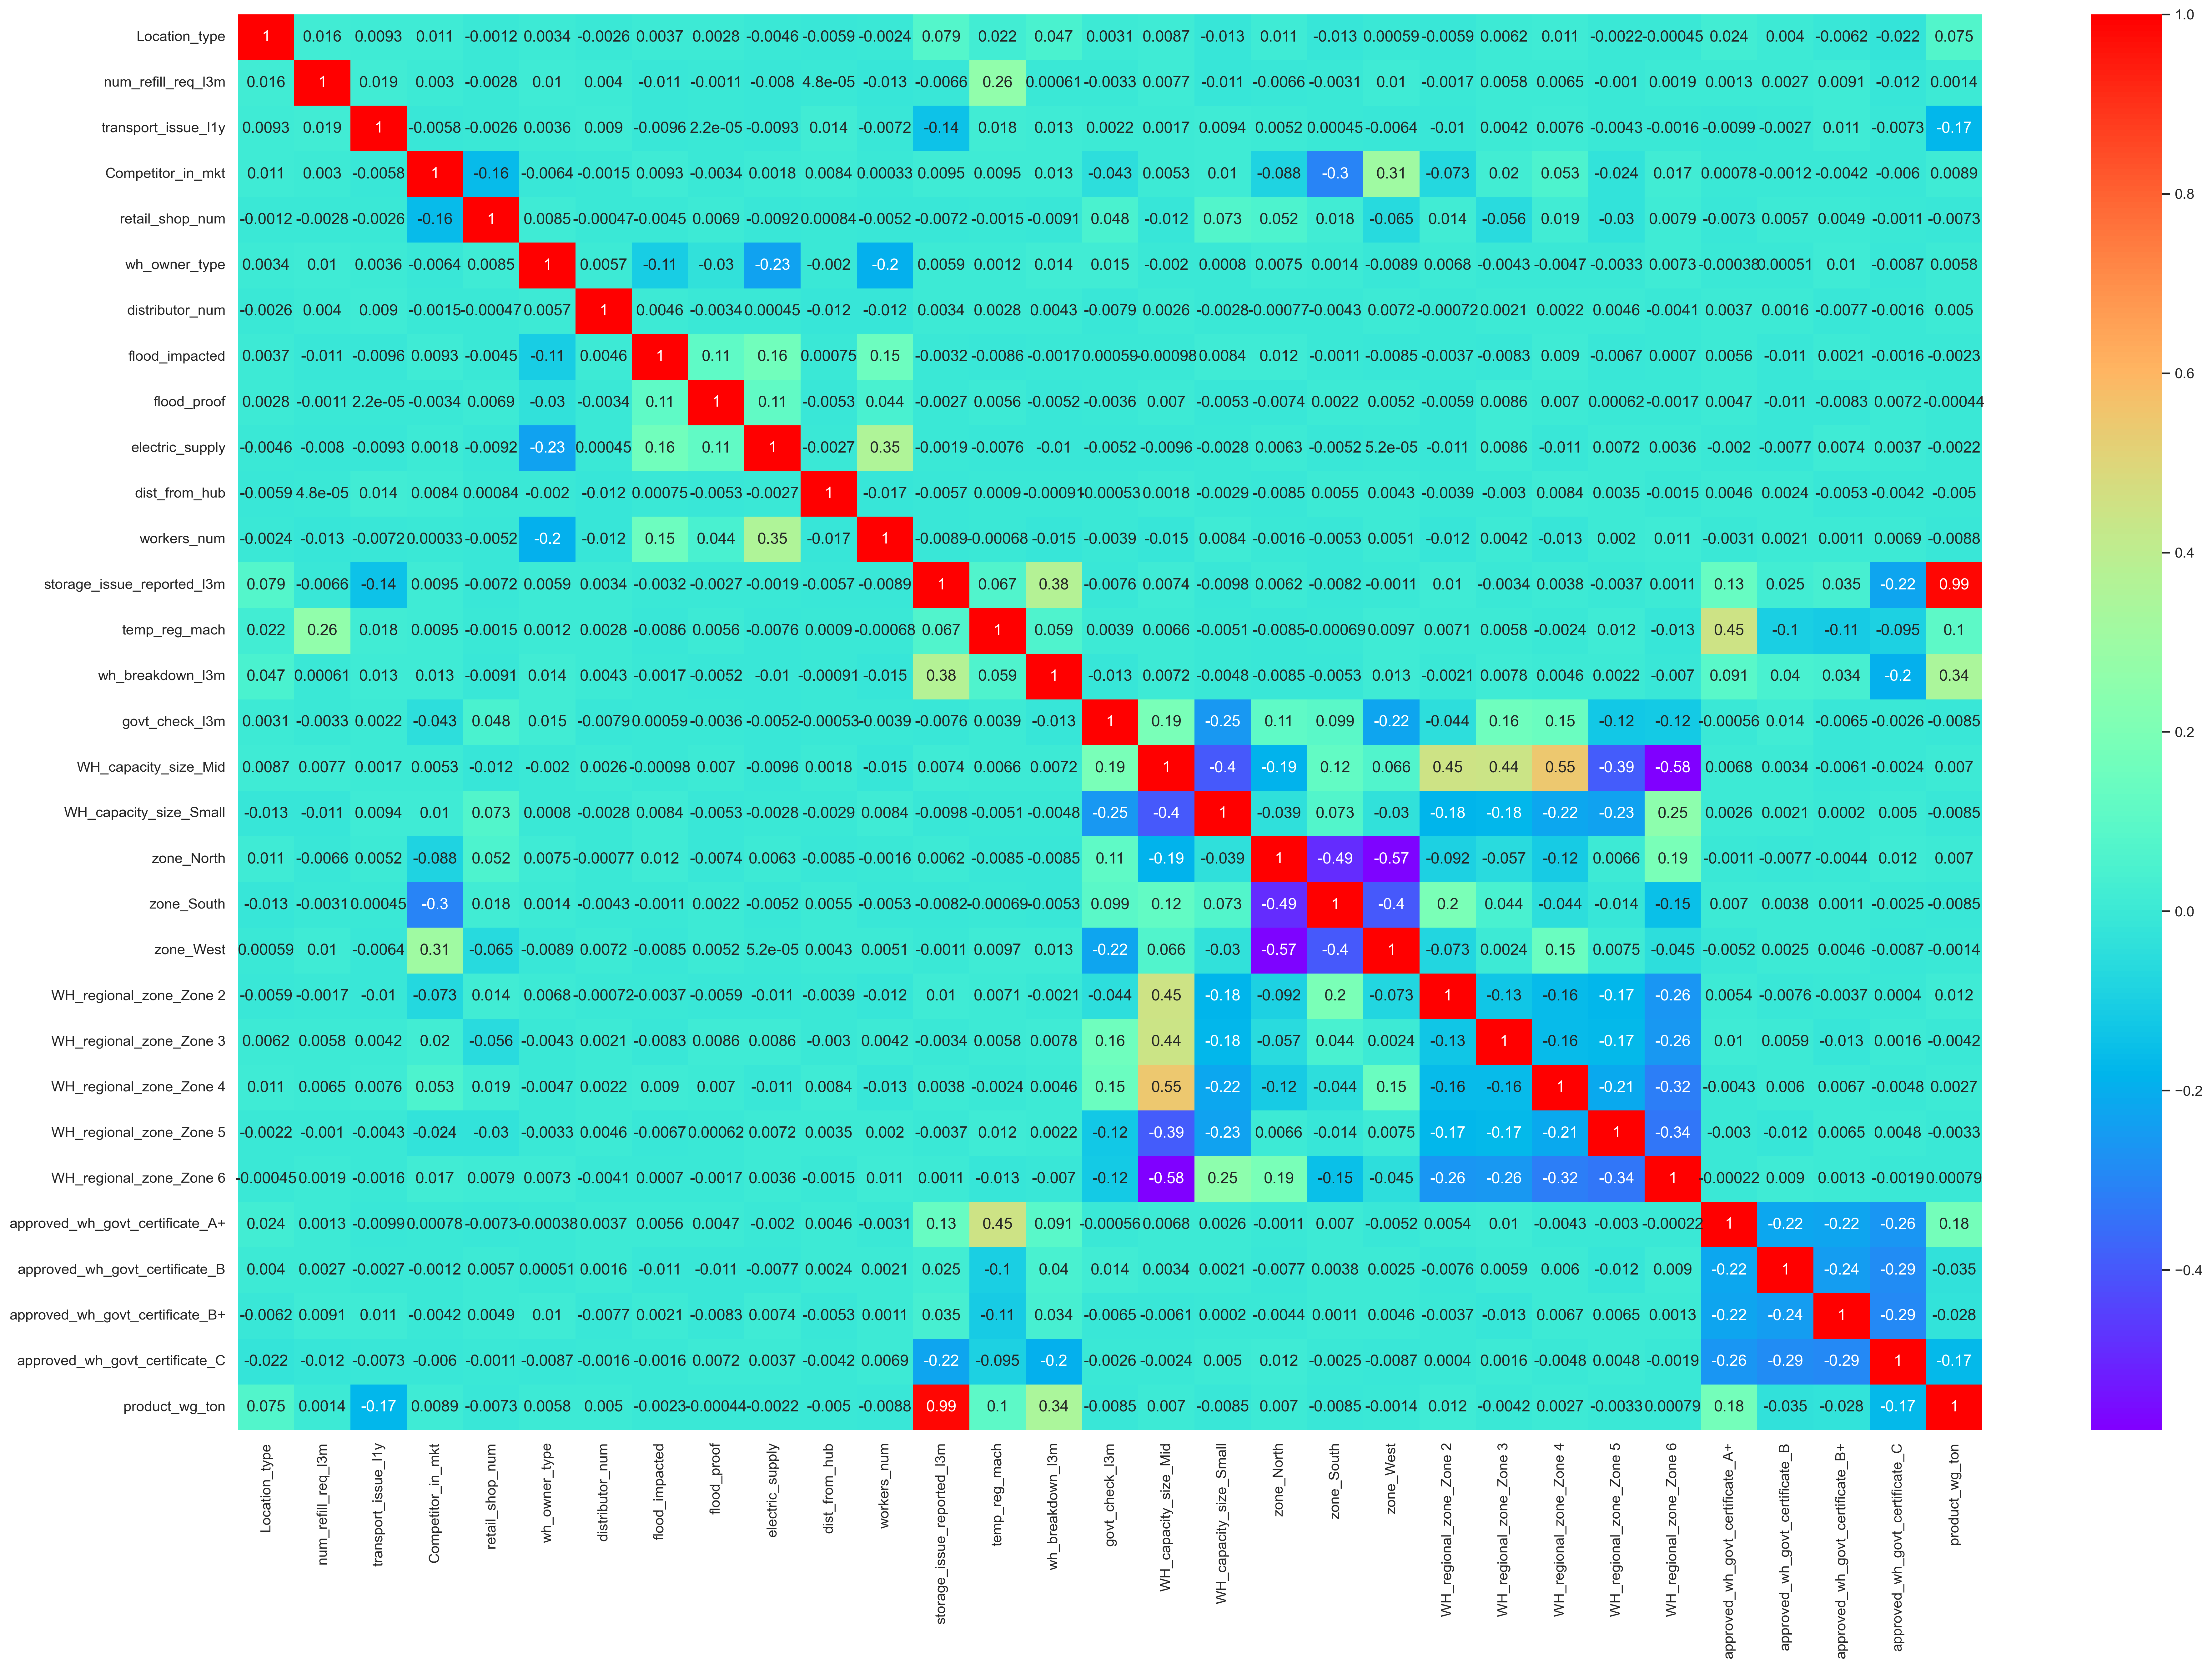

In [51]:
# checking corelation after feature scaling
plt.figure(figsize=(30,20),dpi=300)
corr1 = xy.corr()
sns.heatmap(corr1, annot=True, cmap='rainbow')

###  PCA

In [52]:
#pca
from sklearn.decomposition import PCA

In [53]:
pca = PCA(0.95)
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(25000, 30)
(25000, 24)


In [54]:
x_pcad = pd.DataFrame(x_pca)
x_pcad.columns

RangeIndex(start=0, stop=24, step=1)

In [55]:
x_pcad.head()

0         1         2         3         4         5         6   \
0  1.870217  1.205743 -0.257292  0.531797  1.102617 -0.849262 -1.327503   
1  1.135644 -0.654255 -1.132750  0.738471 -0.912163  0.051448  2.310117   
2 -2.167810 -0.828161  0.391713  0.031388  1.649491 -1.182244 -0.022310   
3 -1.561315 -1.112137  2.571397 -1.338768 -1.832360  2.376112 -0.615864   
4  0.920938 -1.182543 -0.550468  1.665626 -0.957022  0.126303  2.449843   

         7         8         9         10        11        12        13  \
0 -0.049484  0.013915  0.100065 -1.064711  2.495499  3.016811  1.622371   
1  0.174071 -0.540451  0.437638 -0.261910 -1.546042 -0.124924 -0.440081   
2  0.130362  0.733921  2.142489  0.402007 -0.722352  0.250498 -0.777612   
3  0.042169  1.269306 -1.892974  0.889235 -0.079066  1.462609 -1.153519   
4  0.111866 -0.224195  0.955745 -1.125680  0.545185  0.837021 -0.081343   

         14        15        16        17        18        19        20  \
0  1.499958  2.407602  0.291979  0.958255 -2.137393  0.417366 -0.719637   
1 -0.272376 -0.245978  1.232526  0.897350 -0.333201 -0.230770  0.295224   
2 -0.996451 -0.696017 -1.104774 -0.135568 -0.302897  0.254255  1.173364   
3 -0.371347  1.093817  1.793992 -0.784076  0.709761 -0.212171 -0.228706   
4 -0.110371  0.149663 -0.434664 -1.617869  2.500889 -0.784631  0.802847   

         21        22        23  
0 -0.700849 -0.082422 -0.999471  
1  1.225531 -0.226031 -1.009476  
2  0.924120  1.902083 -1.072353  
3 -0.374318  0.092364  0.932290  
4 -0.475984 -0.812942 -0.684830

In [56]:
#checking VIF values after PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_pca

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i ) for i in range(variable.shape[1])]

vif['Features'] = x_pcad.columns

In [57]:
vif

Variance Inflation Factor  Features
0                         1.0         0
1                         1.0         1
2                         1.0         2
3                         1.0         3
4                         1.0         4
5                         1.0         5
6                         1.0         6
7                         1.0         7
8                         1.0         8
9                         1.0         9
10                        1.0        10
11                        1.0        11
12                        1.0        12
13                        1.0        13
14                        1.0        14
15                        1.0        15
16                        1.0        16
17                        1.0        17
18                        1.0        18
19                        1.0        19
20                        1.0        20
21                        1.0        21
22                        1.0        22
23                        1.0        23

### Model Buliding

In [58]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.3,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17500, 24)
(7500, 24)
(17500, 1)
(7500, 1)


In [59]:
#importing the modules for different algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

In [60]:
#Evaluation metrics
from sklearn.metrics import r2_score

In [61]:
# LinearRegression
linear = LinearRegression()
lr = linear.fit(x_train, y_train)
y_pred_lr_train = linear.predict(x_train)
r2_lr_train = r2_score(y_train, y_pred_lr_train)
y_pred_lr_test = linear.predict(x_test)
r2_lr_test = r2_score(y_test, y_pred_lr_test)
print(r2_lr_train)
print(r2_lr_test)

0.9771911166205572
0.9771879159362039


In [62]:
# decisiontree
dtree = DecisionTreeRegressor()
dt = dtree.fit(x_train, y_train)
y_pred_dt_train = dtree.predict(x_train)
r2_dt_train = r2_score(y_train, y_pred_dt_train)
y_pred_dt_test = dtree.predict(x_test)
r2_dt_test = r2_score(y_test, y_pred_dt_test)
print(r2_dt_train)
print(r2_dt_test)


1.0
0.8102906811245795


In [63]:
# RandomForest
rfmodel = RandomForestRegressor()
rf = rfmodel.fit(x_train, y_train)
y_pred_rf_train = rfmodel.predict(x_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
y_pred_rf_test = rfmodel.predict(x_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)
print(r2_rf_train)
print(r2_rf_test)

0.9904004954877333
0.9346005857011483


In [64]:
# Bagging
bagg = BaggingRegressor()
bg = bagg.fit(x_train, y_train)
y_pred_bg_train = bagg.predict(x_train)
r2_bg_train = r2_score(y_train, y_pred_bg_train)
y_pred_bg_test = bagg.predict(x_test)
r2_bg_test = r2_score(y_test, y_pred_bg_test)
print(r2_bg_train)
print(r2_bg_test)

0.9842248732152299
0.9212555732734207


In [65]:
# AdaBoost
ada = AdaBoostRegressor()
Ad = ada.fit(x_train, y_train)
y_pred_ad_train = ada.predict(x_train)
r2_ad_train = r2_score(y_train, y_pred_ad_train)
y_pred_ad_test = ada.predict(x_test)
r2_ad_test = r2_score(y_test, y_pred_ad_test)
print(r2_ad_train)
print(r2_ad_test)

0.7856766055915795
0.7813666508867101


In [66]:
# GradientBoosting
gdb = GradientBoostingRegressor()
gd = gdb.fit(x_train, y_train)
y_pred_gd_train = gdb.predict(x_train)
r2_gd_train = r2_score(y_train, y_pred_gd_train)
y_pred_gd_test = gdb.predict(x_test)
r2_gd_test = r2_score(y_test, y_pred_gd_test)
print(r2_gd_train)
print(r2_gd_test)

0.9554989244782539
0.9471199406691225


In [67]:
# XGBoost
xgb = XGBRegressor()
xg = xgb.fit(x_train, y_train)
y_pred_xg_train = xgb.predict(x_train)
r2_xg_train = r2_score(y_train, y_pred_xg_train)
y_pred_xg_test = xgb.predict(x_test)
r2_xg_test = r2_score(y_test, y_pred_xg_test)
print(r2_xg_train)
print(r2_xg_test)

0.9892717099532238
0.9636672566462352


In [68]:
#Support vector regressor
svr = SVR()
sv = svr.fit(x_train, y_train)
y_pred_sv_train = svr.predict(x_train)
r2_sv_train = r2_score(y_train, y_pred_sv_train)
y_pred_sv_test = svr.predict(x_test)
r2_sv_test = r2_score(y_test, y_pred_sv_test)
print(r2_sv_train)
print(r2_sv_test)

0.030337700323043393
0.029937995724246047


In [69]:
#Voting Regressor
evc = VotingRegressor(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),('ad',Ad),
                                  ('gd', gd),('xg', xg)])

model_evc = evc.fit(x_train, y_train)
y_pred_evc_train = evc.predict(x_train)
r2_evc_train = r2_score(y_train, y_pred_evc_train)
y_pred_evc_test = evc.predict(x_test)
r2_evc_test = r2_score(y_test, y_pred_evc_test)
print(r2_evc_train)
print(r2_evc_test)

0.9844911725873325
0.9530758747715627


        Method Used  Train Accuracy  Test Accuracy
0  LinearRegression        0.977191       0.977188
1      DecisionTree        1.000000       0.810291
2      RandomForest        0.990400       0.934601
3           Bagging        0.984225       0.921256
4          Adaboost        0.785677       0.781367
5  GradientBoosting        0.955499       0.947120
6           XGBoost        0.989272       0.963667
7     SupportVector        0.030338       0.029938
8   VotingRegressor        0.984491       0.953076


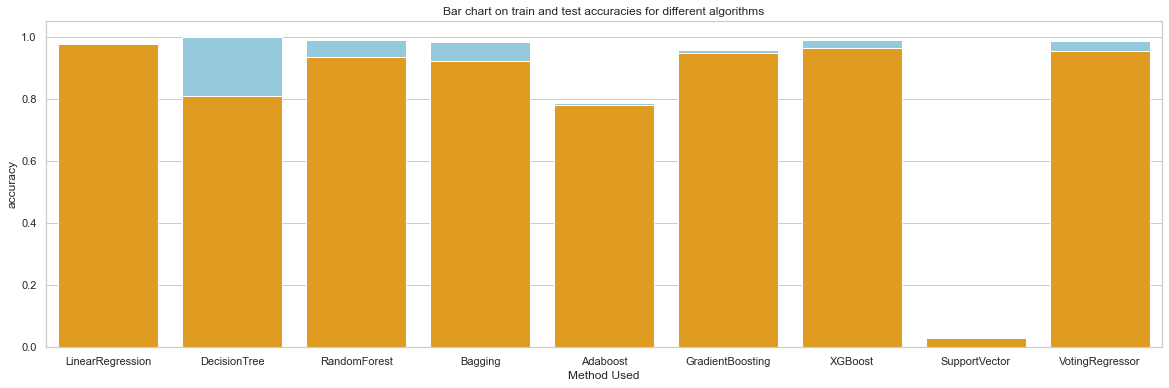

In [70]:
list1 = ['LinearRegression','DecisionTree','RandomForest','Bagging','Adaboost',
         'GradientBoosting', 'XGBoost','SupportVector','VotingRegressor']

list2 = [r2_lr_train, r2_dt_train, r2_rf_train, r2_bg_train,r2_ad_train, r2_gd_train, 
         r2_xg_train, r2_sv_train, r2_evc_train]

list3 = [r2_lr_test, r2_dt_test, r2_rf_test, r2_bg_test,r2_ad_test, r2_gd_test, 
         r2_xg_test, r2_sv_test, r2_evc_test]


#list4 = [linear, dtree, rfmodel, bagg, ada, gdb, xgb, svr, knn,evc ]

final_accuracy = pd.DataFrame({'Method Used': list1, "Train Accuracy": list2,"Test Accuracy": list3})
print(final_accuracy)

sns.set(style="whitegrid")
plt.figure(figsize=(20,6))

sns.barplot(x="Method Used", y = 'Train Accuracy', data=final_accuracy, color='skyblue', label='train accuracy')
sns.barplot(x="Method Used", y = 'Test Accuracy', data=final_accuracy, color='orange', label='test accuracy')
#charts.set_xticklabels(charts.get_xticklabels(), rotation=90)

plt.xlabel('Method Used')
plt.ylabel('accuracy')
plt.title('Bar chart on train and test accuracies for different algorithms')


plt.savefig('accuracy1.png', dpi=300,bbox_inches='tight')
plt.show()

### Model Evaluation

In [71]:
from sklearn import metrics

In [72]:
# Evaluate Linear Regression's metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_lr_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_lr_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lr_test)))

MAE: 1357.0092110706933
MSE: 3089618.4035339435
RMSE: 1757.7310384509751


In [73]:
#check OLS method for linear regression

In [74]:
from statsmodels.regression.linear_model import OLS

In [75]:
import statsmodels.regression.linear_model as smf

In [76]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()

In [77]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         product_wg_ton   R-squared (uncentered):                   0.213
Model:                            OLS   Adj. R-squared (uncentered):              0.212
Method:                 Least Squares   F-statistic:                              197.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        21:31:51   Log-Likelihood:                     -1.9994e+05
No. Observations:               17500   AIC:                                  3.999e+05
Df Residuals:                   17476   BIC:                                  4.001e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -155.8188    103.754     -1.502      0.133    -359.187      47.549
x2          1571.7617    122.061     12.877      0.000    1332.509    1811.014
x3          4776.1566    124.015     38.513      0.000    4533.076    5019.238
x4           666.6159    130.398      5.112      0.000     411.023     922.209
x5          -158.4403    132.861     -1.193      0.233    -418.862     101.981
x6         -2736.6535    136.593    -20.035      0.000   -3004.389   -2468.918
x7           331.0973    140.295      2.360      0.018      56.106     606.089
x8           134.8760    150.564      0.896      0.370    -160.244     429.996
x9           465.9751    154.106      3.024      0.003     163.912     768.039
x10         3083.2191    156.086     19.753      0.000    2777.275    3389.164
x11        -3160.2575    159.312    -19.837      0.000   -3472.525   -2847.990
x12         1510.1127    165.456      9.127      0.000    1185.803    1834.422
x13         -735.9117    166.809     -4.412      0.000   -1062.875    -408.949
x14          588.7613    166.817      3.529      0.000     261.784     915.738
x15         -393.6887    168.327     -2.339      0.019    -723.627     -63.750
x16        -1467.3286    169.219     -8.671      0.000   -1799.014   -1135.643
x17           15.7893    169.605      0.093      0.926    -316.654     348.233
x18        -2164.4549    173.470    -12.477      0.000   -2504.474   -1824.436
x19          -77.8850    180.676     -0.431      0.666    -432.029     276.258
x20          220.8286    182.959      1.207      0.227    -137.790     579.447
x21          123.5240    185.742      0.665      0.506    -240.548     487.596
x22          -44.9181    195.621     -0.230      0.818    -428.354     338.518
x23         -179.8879    211.295     -0.851      0.395    -594.048     234.272
x24         8506.9969    219.178     38.813      0.000    8077.387    8936.607
==============================================================================
Omnibus:                     2806.905   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7453.239
Skew:                           0.881   Prob(JB):                         0.00
Kurtosis:                       5.668   Cond. No.                         2.11
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
#Durbin-waton value is 0.013, so there is a Positive Auto Correlation. So reject Linear Regression model. 

In [79]:
#XGBoost algorithm have good train and test accuracy.

In [80]:
print('MAE:',metrics.mean_absolute_error(y_train,y_pred_xg_train))
print('MSE:',metrics.mean_squared_error(y_train,y_pred_xg_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_xg_train)))

MAE: 929.1243539794922
MSE: 1442224.3166626187
RMSE: 1200.9264409873815


In [81]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_xg_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_xg_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_xg_test)))

MAE: 1728.38261831131
MSE: 4920826.707579103
RMSE: 2218.2936477344706


In [82]:
#cross validation on xg model
from sklearn.model_selection import cross_val_score
cv_xg_train_accuracy = cross_val_score(xg, x_train, y_train, cv=10)
cv_xg_test_accuracy = cross_val_score(xg, x_test, y_test, cv=10)
print(cv_xg_train_accuracy)
print(cv_xg_test_accuracy)
print(round(np.mean(cv_xg_train_accuracy)*100,2))
print(round(np.mean(cv_xg_test_accuracy)*100,2))

[0.96522465 0.96250657 0.96282542 0.96492196 0.9641302  0.95823125
 0.96312337 0.96232808 0.96070781 0.96255417]
[0.94724675 0.95274084 0.94671893 0.94824724 0.94743711 0.94883326
 0.9493137  0.94598451 0.94624824 0.94895406]
96.27
94.82


In [83]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_rf_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_rf_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf_test)))

MAE: 2292.3499506666667
MSE: 8857552.577528467
RMSE: 2976.1640710028855


In [84]:
#cross validation on rf model
from sklearn.model_selection import cross_val_score
cv_rf_train_accuracy = cross_val_score(rf, x_train, y_train, cv=10)
cv_rf_test_accuracy = cross_val_score(rf, x_test, y_test, cv=10)
print(cv_rf_train_accuracy)
print(cv_rf_test_accuracy)
print(round(np.mean(cv_rf_train_accuracy)*100,2))
print(round(np.mean(cv_rf_test_accuracy)*100,2))

[0.93190403 0.93198426 0.92864659 0.93189462 0.93271968 0.92590488
 0.93436805 0.93023599 0.93338768 0.9361227 ]
[0.91531798 0.91155393 0.91307033 0.91405506 0.90636273 0.91439409
 0.90964118 0.91877735 0.90273049 0.91785309]
93.17
91.24
